In [1]:
import pandas as pd
import sqlite3 as sql # included as part of python standard library
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image

In [2]:
conn  = sql.connect("Db-IMDB.db")

In [3]:
# Get list of all tables in the DB.
result = pd.read_sql_query("SELECT tbl_name FROM sqlite_master where type = 'table';", conn)
print(result)

      tbl_name
0        Movie
1        Genre
2     Language
3      Country
4     Location
5   M_Location
6    M_Country
7   M_Language
8      M_Genre
9       Person
10  M_Producer
11  M_Director
12      M_Cast


## **Question -1 :-** List all the directors who directed a 'Comedy' movie in a leap year. (You need to check that the genre is 'Comedy’ and year is a leap year) Your query should return director name, the movie name, and the year.

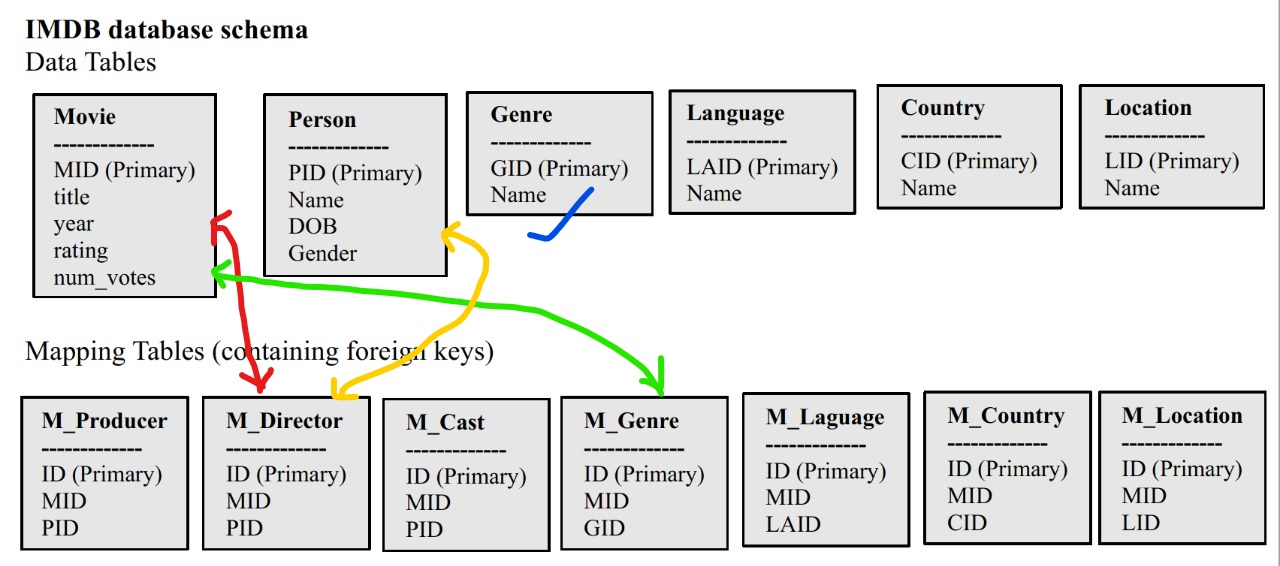

In [4]:
Image("img/ans_1.jpg",width=1200, height=200)

In [5]:
ans_1 = pd.read_sql_query("""SELECT DISTINCT TRIM(p.name) Movie_Director, m.title Movie, m.year Year \
                             FROM movie m,Person p,M_Director md,M_Genre mg,Genre g \
                             ON m.MID=md.MID AND m.MID=mg.MID AND p.PID=md.PID \
                             AND g.Name LIKE '%Comedy%' AND (CAST(SUBSTR(m.year,-4) AS UNSIGNED) %4 = 0) ORDER BY Movie_Director""", conn)

In [6]:
ans_1

,Movie_Director,Movie,Year
0,A. Bhimsingh,Aadmi,1968
1,A. Bhimsingh,Sadhu Aur Shaitaan,1968
2,A. Bhimsingh,Joroo Ka Ghulam,1972
3,A. Muthu,Tera Jadoo Chal Gayaa,2000
4,A.R. Murugadoss,Ghajini,2008
...,...,...,...
847,Yash Chopra,Vijay,1988
848,Yash Chopra,Mashaal,1984
849,Yogesh Ishwar,Aaghaaz,2000
850,Yograj Bhat,Ranga S.S.L.C,2004


## Question:- 2:-  List all names of actors who playes in the movie 'Anand'

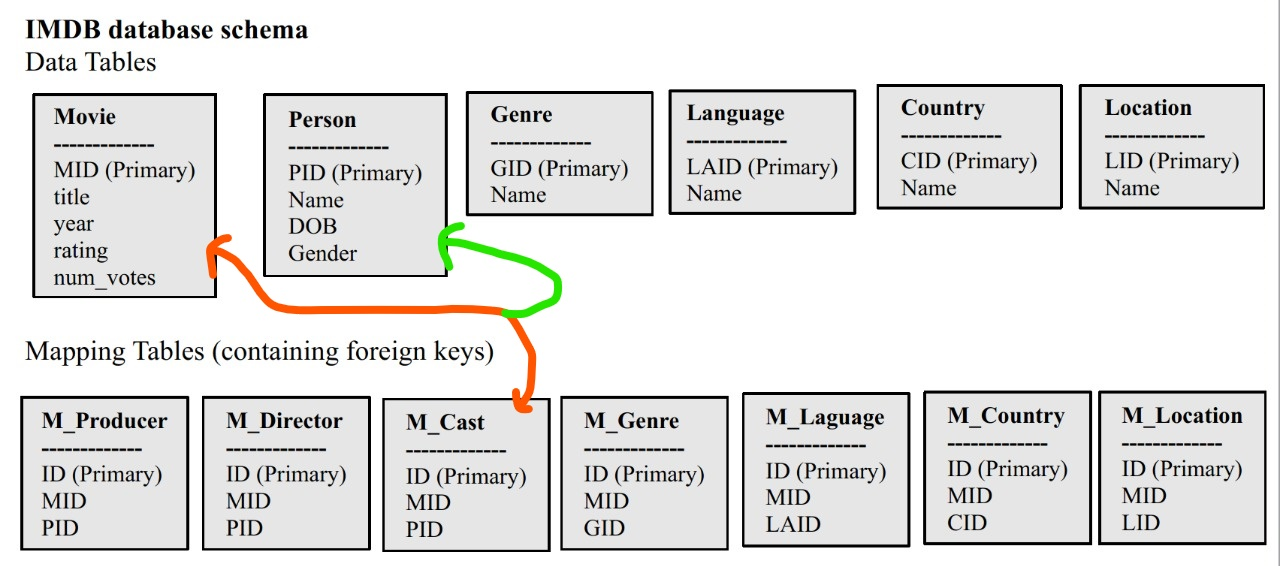

In [7]:
Image("img/ans_2.jpg",width=1200, height=200)

In [8]:
ans_2 = pd.read_sql_query("""SELECT p.Name FROM movie m \
                             JOIN M_Cast mc ON m.MID=mc.MID \
                             JOIN Person p ON Trim(mc.PID)=Trim(p.PID) \
                             WHERE m.Title = 'Anand'
                             """, conn)

In [9]:
ans_2

,Name
0,Amitabh Bachchan
1,Rajesh Khanna
2,Sumita Sanyal
3,Ramesh Deo
4,Seema Deo
5,Asit Kumar Sen
6,Dev Kishan
7,Atam Prakash
8,Lalita Kumari
9,Savita
